In [1]:
from keras.datasets import cifar100
from keras.utils import np_utils
import numpy as np

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data(label_mode='fine')

print('train data:', 'images:', x_img_train.shape,
                     'labels:', y_label_train.shape)
print(' test data:', 'images:', x_img_test.shape,
                     'labels:', y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
 test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [3]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [4]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

In [5]:
model = inputs = Input((32, 32, 3))
model = Conv2D(filters=64, kernel_size=3, padding='same')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = Conv2D(filters=64, kernel_size=3, padding='same')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = MaxPooling2D(pool_size=2)(model) # 16x16
model = Dropout(0.25)(model)

model = Conv2D(filters=128, kernel_size=3, padding='same')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = Conv2D(filters=128, kernel_size=3, padding='same')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = MaxPooling2D(pool_size=2)(model) # 8x8
model = Dropout(0.25)(model)

model = Conv2D(filters=256, kernel_size=3, padding='same')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = Conv2D(filters=256, kernel_size=3, padding='same')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = MaxPooling2D(pool_size=2)(model) # 4x4
model = Dropout(0.5)(model)

model = Conv2D(filters=512, kernel_size=3, padding='same')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = Conv2D(filters=512, kernel_size=3, padding='same')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = MaxPooling2D(pool_size=2)(model) # 2x2
model = Dropout(0.5)(model)

model = Flatten()(model)
model = Dropout(0.5)(model)
model = Dense(units=512)(model)
model = Activation('relu')(model)
model = Dropout(0.5)(model)
model = Dense(units=100)(model)
model = Activation('softmax')(model)
model = Model(inputs=inputs, outputs=model)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001), metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=200, batch_size=1024, verbose=1)

Epoch 1/200
40/40 [==============================] - 15s 204ms/step - loss: 5.5754 - accuracy: 0.0102 - val_loss: 4.6054 - val_accuracy: 0.0092
Epoch 2/200
40/40 [==============================] - 6s 138ms/step - loss: 4.5843 - accuracy: 0.0160 - val_loss: 4.6057 - val_accuracy: 0.0090
Epoch 3/200
40/40 [==============================] - 5s 137ms/step - loss: 4.5414 - accuracy: 0.0168 - val_loss: 4.6131 - val_accuracy: 0.0089
Epoch 4/200
40/40 [==============================] - 5s 128ms/step - loss: 4.4895 - accuracy: 0.0203 - val_loss: 4.6425 - val_accuracy: 0.0117
Epoch 5/200
40/40 [==============================] - 5s 128ms/step - loss: 4.4348 - accuracy: 0.0212 - val_loss: 4.8174 - val_accuracy: 0.0102
Epoch 6/200
40/40 [==============================] - 5s 128ms/step - loss: 4.3967 - accuracy: 0.0241 - val_loss: 5.0500 - val_accuracy: 0.0083
Epoch 7/200
40/40 [==============================] - 5s 128ms/step - loss: 4.3581 - accuracy: 0.0249 - val_loss: 5.2415 - val_accuracy: 0.009

In [7]:
import matplotlib.pyplot as plt
def show_train_history(tr_history, train, valid):
    plt.plot(tr_history.history[train])
    plt.plot(tr_history.history[valid])
    plt.title('Train History')
    plt.xlabel('epoch'); plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')

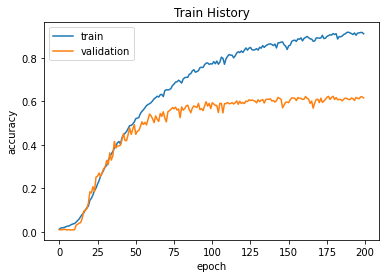

In [8]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

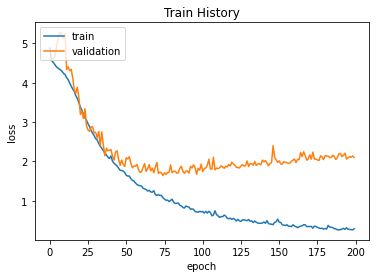

In [9]:
show_train_history(train_history, 'loss', 'val_loss')

In [10]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print('lose =', scores[0])
print('accuracy =', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 2.0535 - accuracy: 0.6248
lose = 2.0535144805908203
accuracy = 0.6248000264167786


In [11]:
model.save('model.h5')